In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [4]:

plt.style.use("seaborn")
plt.rc("font", family=get_font_family())

plt.rc("axes", unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [6]:

train = pd.read_csv("data/klue/train_data.csv")
test = pd.read_csv('data/klue/test_data.csv')
train.shape, test.shape

((45654, 3), (9131, 2))

In [7]:
train.head()

index                             title  topic_idx
0      0          인천→핀란드 항공기 결항…휴가철 여행객 분통          4
1      1    실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화          4
2      2    이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것          4
3      3  NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합          4
4      4         시진핑 트럼프에 중미 무역협상 조속 타결 희망          4

In [8]:
test.head()

index                            title
0  45654       유튜브 내달 2일까지 크리에이터 지원 공간 운영
1  45655          어버이날 맑다가 흐려져…남부지방 옅은 황사
2  45656      내년부터 국가RD 평가 때 논문건수는 반영 않는다
3  45657  김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4  45658   회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간

In [9]:
topic = pd.read_csv("data/klue/topic_dict.csv")
topic

topic  topic_idx
0  IT과학          0
1    경제          1
2    사회          2
3  생활문화          3
4    세계          4
5   스포츠          5
6    정치          6

In [11]:
raw = pd.concat([train, test])
raw.shape

(54785, 3)

In [12]:
raw.head()

index                             title  topic_idx
0      0          인천→핀란드 항공기 결항…휴가철 여행객 분통        4.0
1      1    실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화        4.0
2      2    이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것        4.0
3      3  NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합        4.0
4      4         시진핑 트럼프에 중미 무역협상 조속 타결 희망        4.0

In [13]:
raw.tail()

index                            title  topic_idx
9126  54780     인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여        NaN
9127  54781    노래방에서 지인 성추행 외교부 사무관 불구속 입건종합        NaN
9128  54782     40년 전 부마항쟁 부산 시위 사진 2점 최초 공개        NaN
9129  54783    게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계        NaN
9130  54784  유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구        NaN

In [14]:
df = pd.merge(raw, topic, how="left")
df['topic'].value_counts()

세계      7629
사회      7362
스포츠     6933
정치      6751
경제      6222
생활문화    5933
IT과학    4824
Name: topic, dtype: int64

In [15]:
df.head()

index                             title  topic_idx topic
0      0          인천→핀란드 항공기 결항…휴가철 여행객 분통        4.0    세계
1      1    실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화        4.0    세계
2      2    이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것        4.0    세계
3      3  NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합        4.0    세계
4      4         시진핑 트럼프에 중미 무역협상 조속 타결 희망        4.0    세계

In [17]:
df["len"] = df["title"].apply(lambda x: len(x))
df["word_count"] = df['title'].apply(lambda x: len(x.split()))
df["unique_word_count"] = df['title'].apply(lambda x: len(set(x.split())))
df.head()

index                             title  topic_idx topic  len  word_count  \
0      0          인천→핀란드 항공기 결항…휴가철 여행객 분통        4.0    세계   24           5   
1      1    실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화        4.0    세계   30           6   
2      2    이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것        4.0    세계   30           8   
3      3  NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합        4.0    세계   32           7   
4      4         시진핑 트럼프에 중미 무역협상 조속 타결 희망        4.0    세계   25           7   

   unique_word_count  
0                  5  
1                  6  
2                  8  
3                  7  
4                  7

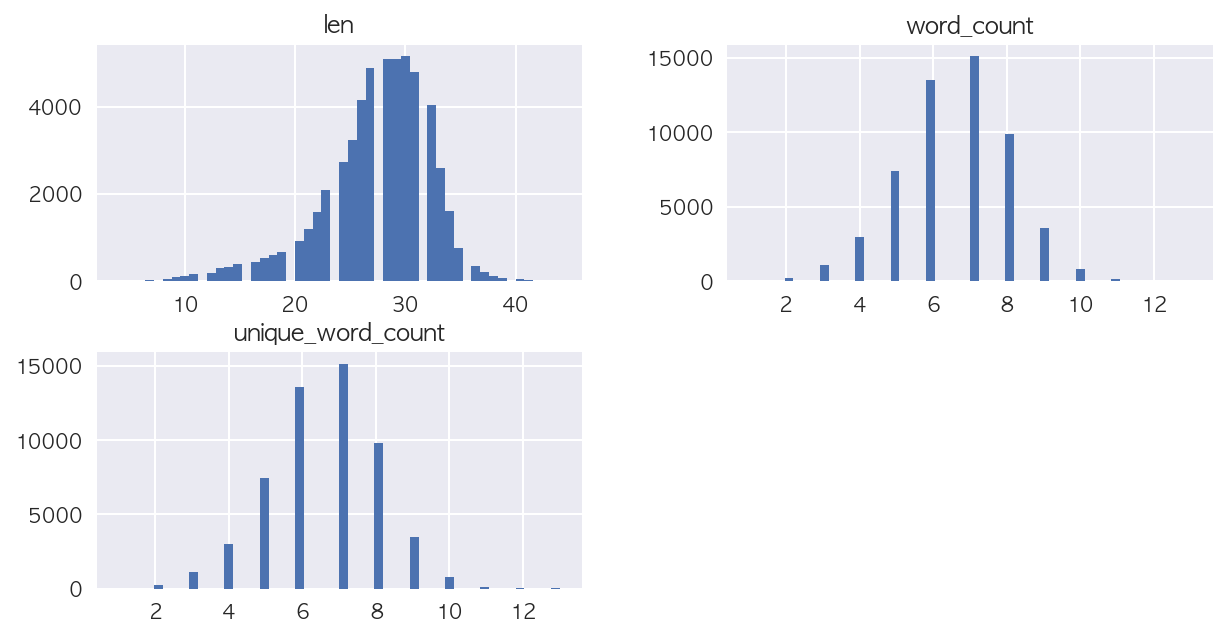

In [18]:
df[['len','word_count','unique_word_count']].hist(bins=50, figsize=(10,5))

plt.show()

In [19]:
df[["len", "word_count", "unique_word_count"]].describe()

len    word_count  unique_word_count
count  54785.000000  54785.000000       54785.000000
mean      27.318846      6.587880           6.576198
std        4.947738      1.471852           1.465320
min        4.000000      1.000000           1.000000
25%       25.000000      6.000000           6.000000
50%       28.000000      7.000000           7.000000
75%       31.000000      8.000000           8.000000
max       44.000000     13.000000          13.000000

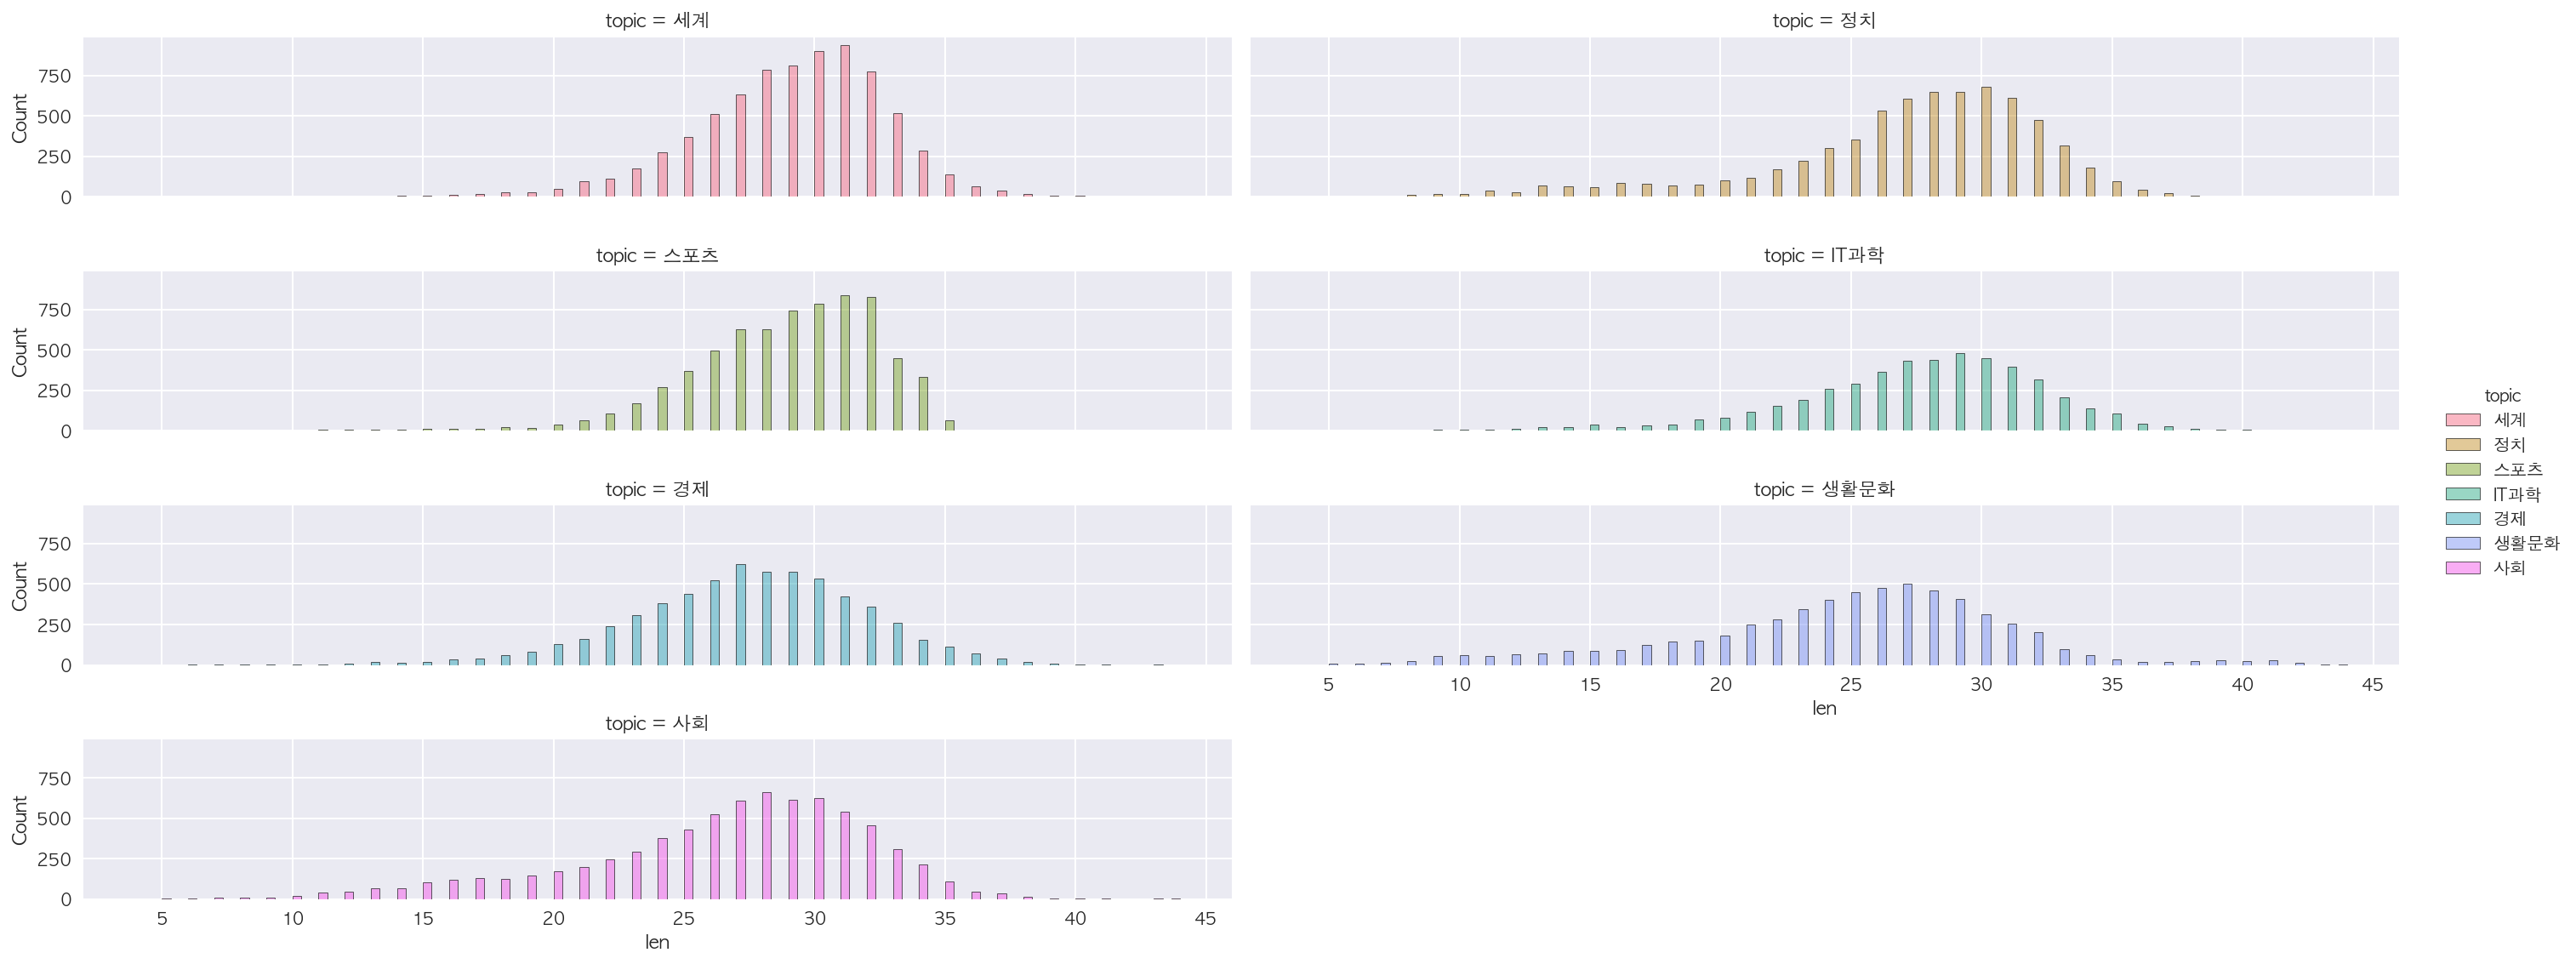

In [20]:

sns.displot(x="len", data=df, hue="topic", col="topic", col_wrap=2, aspect=5, height=2)

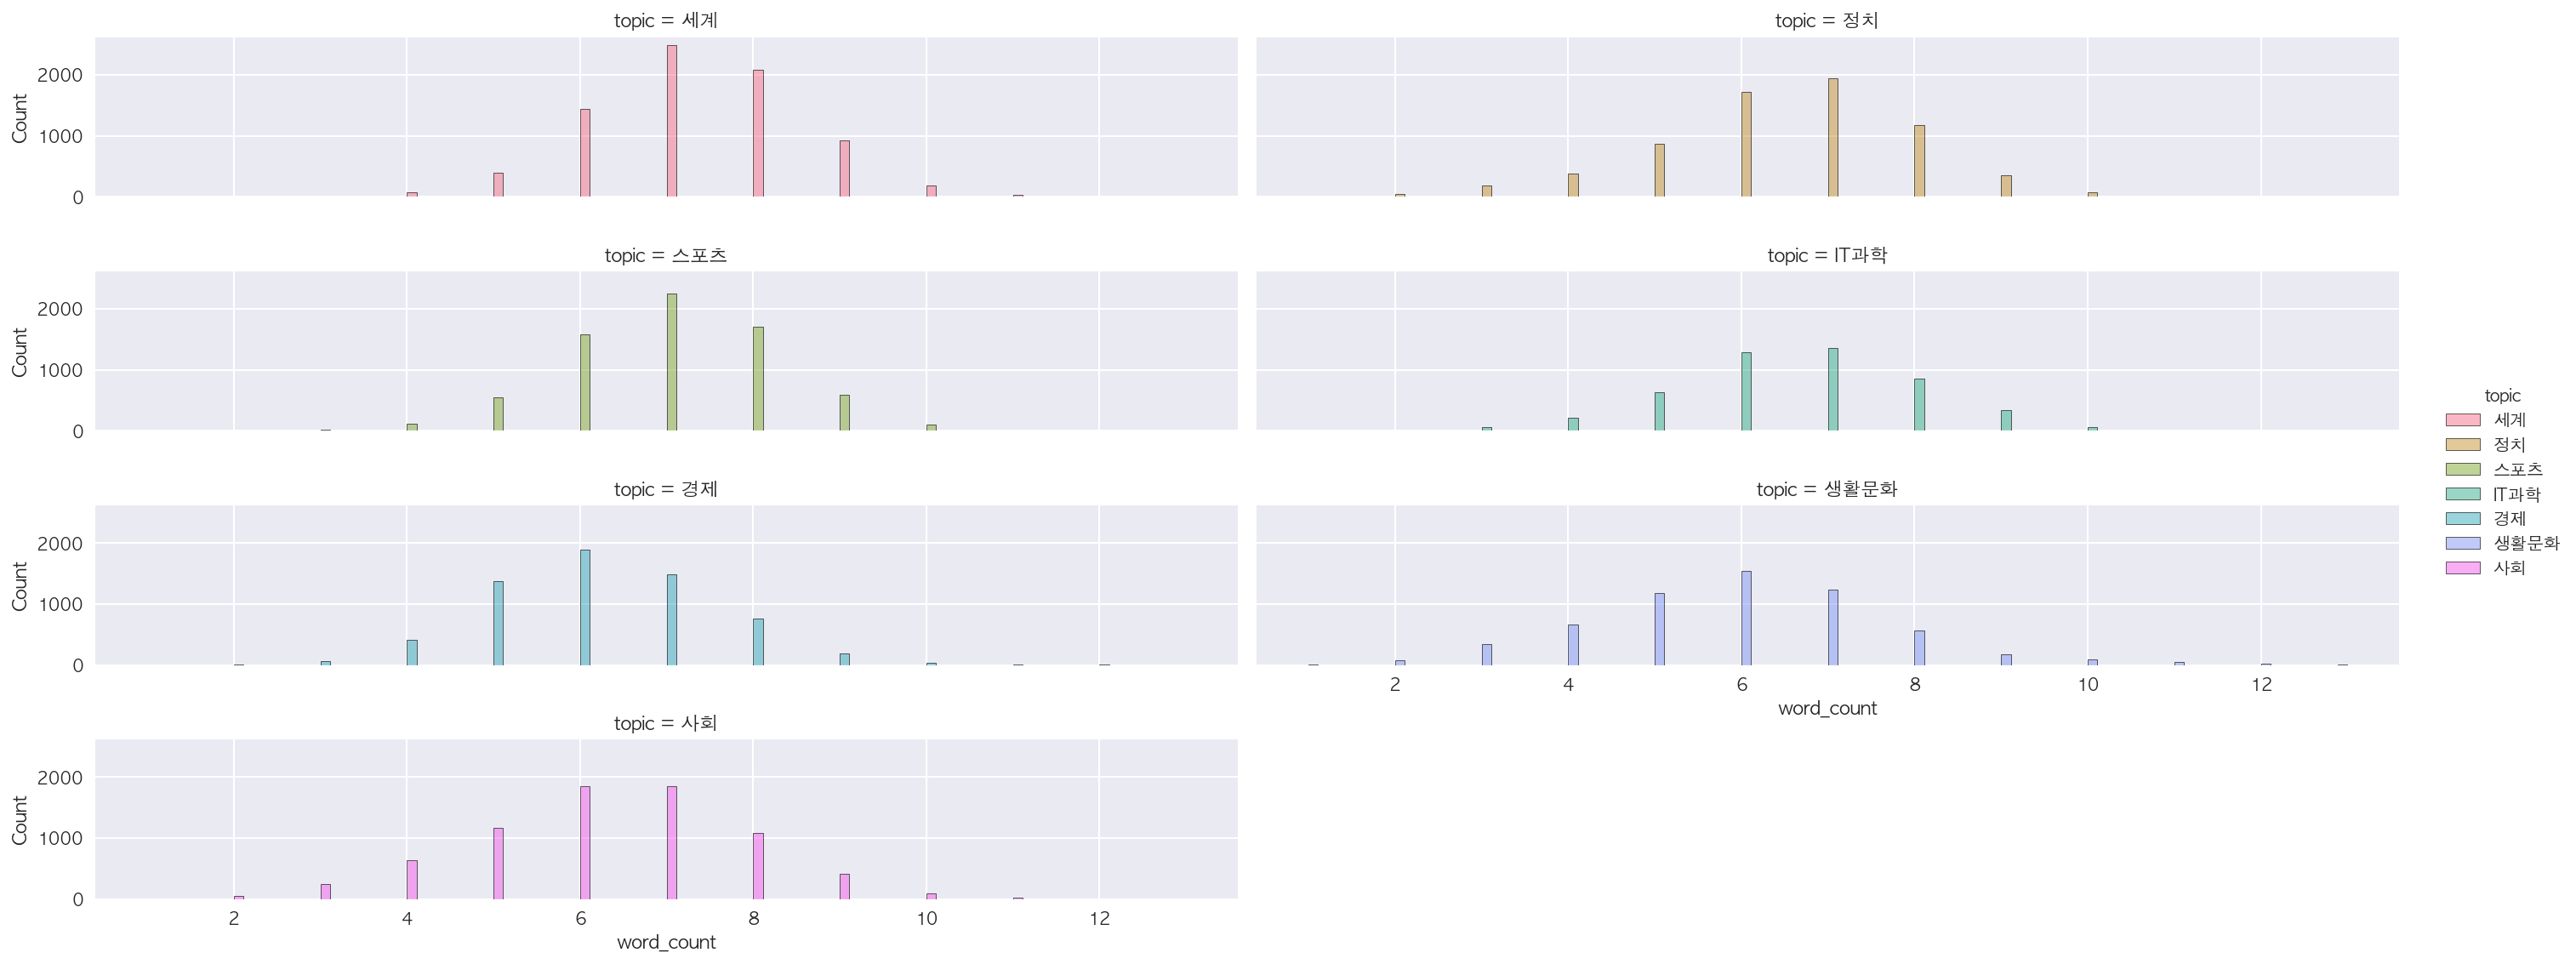

In [21]:
sns.displot(x="word_count", data=df, hue="topic", col="topic", col_wrap=2, aspect=5, height=2)

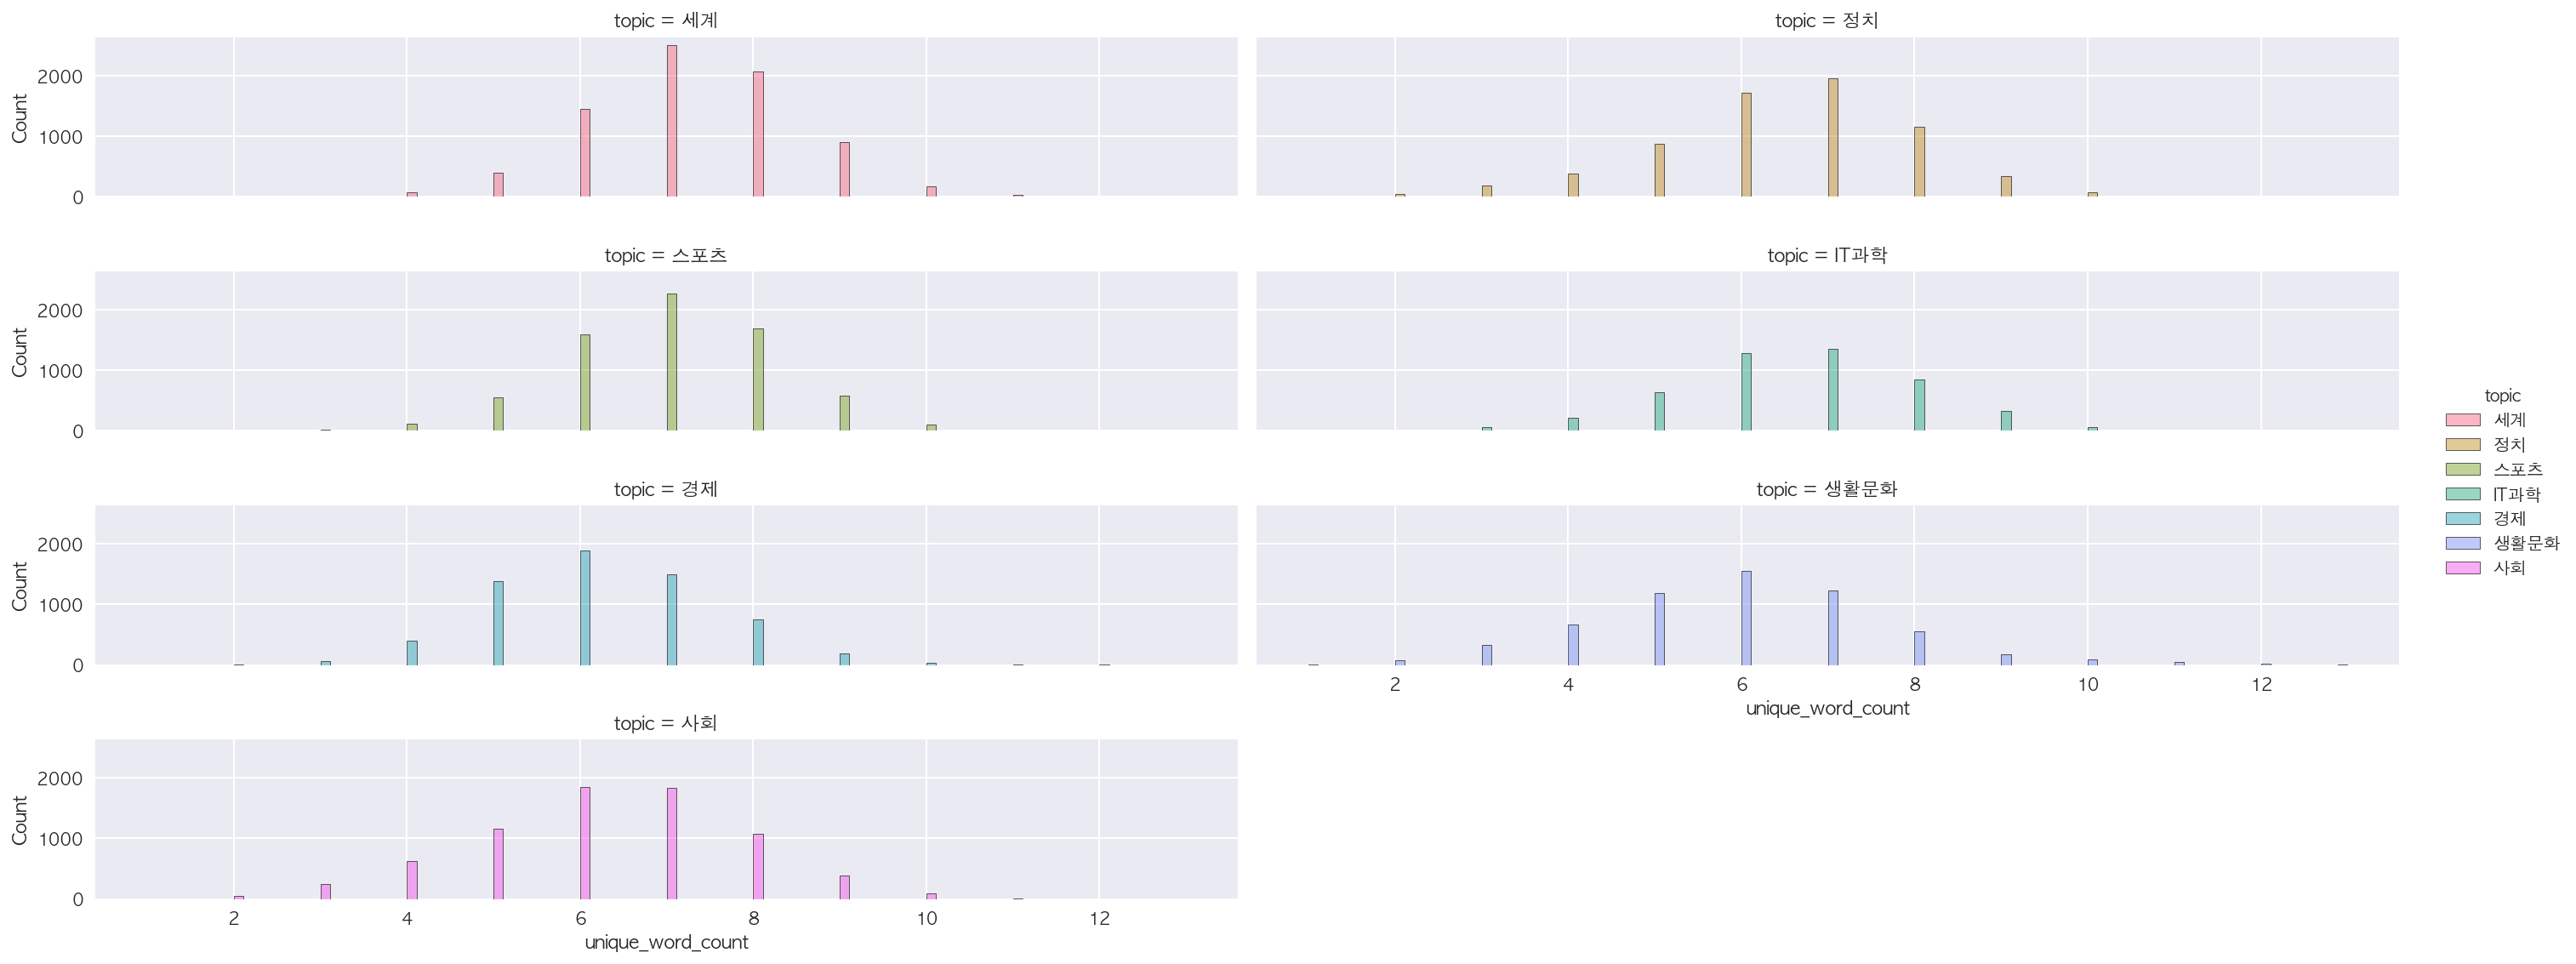

In [22]:

sns.displot(x="unique_word_count", data=df, hue="topic", col="topic", col_wrap=2, aspect=5, height=2)

<AxesSubplot:>

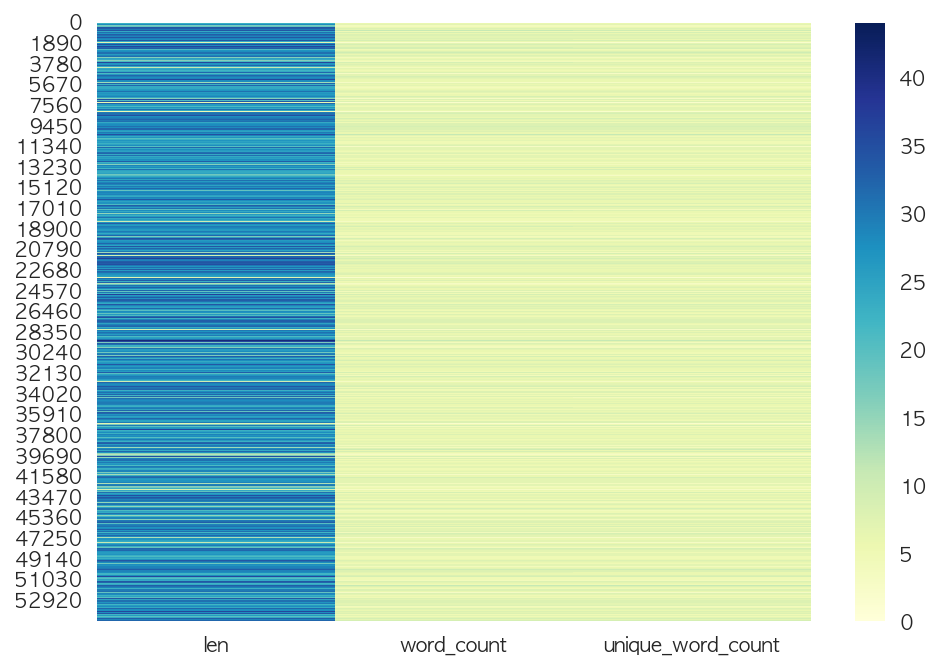

In [23]:
sns.heatmap(df[["len", "word_count", "unique_word_count"]], cmap="YlGnBu", vmin=0)

In [24]:
import re
df["title"] = df["title"].apply(lambda x: re.sub("[0-9]", "", x))
df['title']

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1            실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780             인천 오후 시분 대설주의보…눈 .cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

In [25]:
import string

punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:

df["title"] = df["title"].apply(lambda x: re.sub("[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", "", x))

In [27]:
# df["title"] = df['title'].str.lower()

In [28]:
df["title"] = df['title'].apply(lambda x: re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", x))

In [29]:
import re
re.sub("[\s]+", " ", "공백             전처리")

'공백 전처리'

In [30]:
df["title"] = df['title'].apply(lambda x: re.sub("[\s]+", " ", x))

In [31]:
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = [ '합니다', '하는', '할', '하고', '한다', 
             '그리고', '입니다', '그', '등', '이런', '및','제', '더', '시분']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [32]:
df["title"] = df['title'].apply(remove_stopwords)
df['title']

0                인천핀란드 항공기 결항휴가철 여행객 분통
1            실리콘밸리 넘어서겠다구글 조원 들여 전역 거점화
2        이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3            클린턴 측근기업 특수관계 조명공과 사 맞물려종합
4             시진핑 트럼프에 중미 무역협상 조속 타결 희망
                      ...              
54780                   인천 오후 대설주의보눈 쌓여
54781     노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782         년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑 아프리카개발은행 총회 개회식 생중계
54784    유영민 과기장관 강소특구는 지역 혁신의 중심지원책 강구
Name: title, Length: 54785, dtype: object

In [51]:

from wordcloud import WordCloud

def display_word_cloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/AppleGothic.ttf",
        width=width, height=height,
        stopwords=["합니다", "입니다", '연', '일', '월', '첫', '것','명', '년', '위' ,'듯', '에', '한', '만명', '대'], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

In [35]:
content = ' '.join(df['title'].to_list())

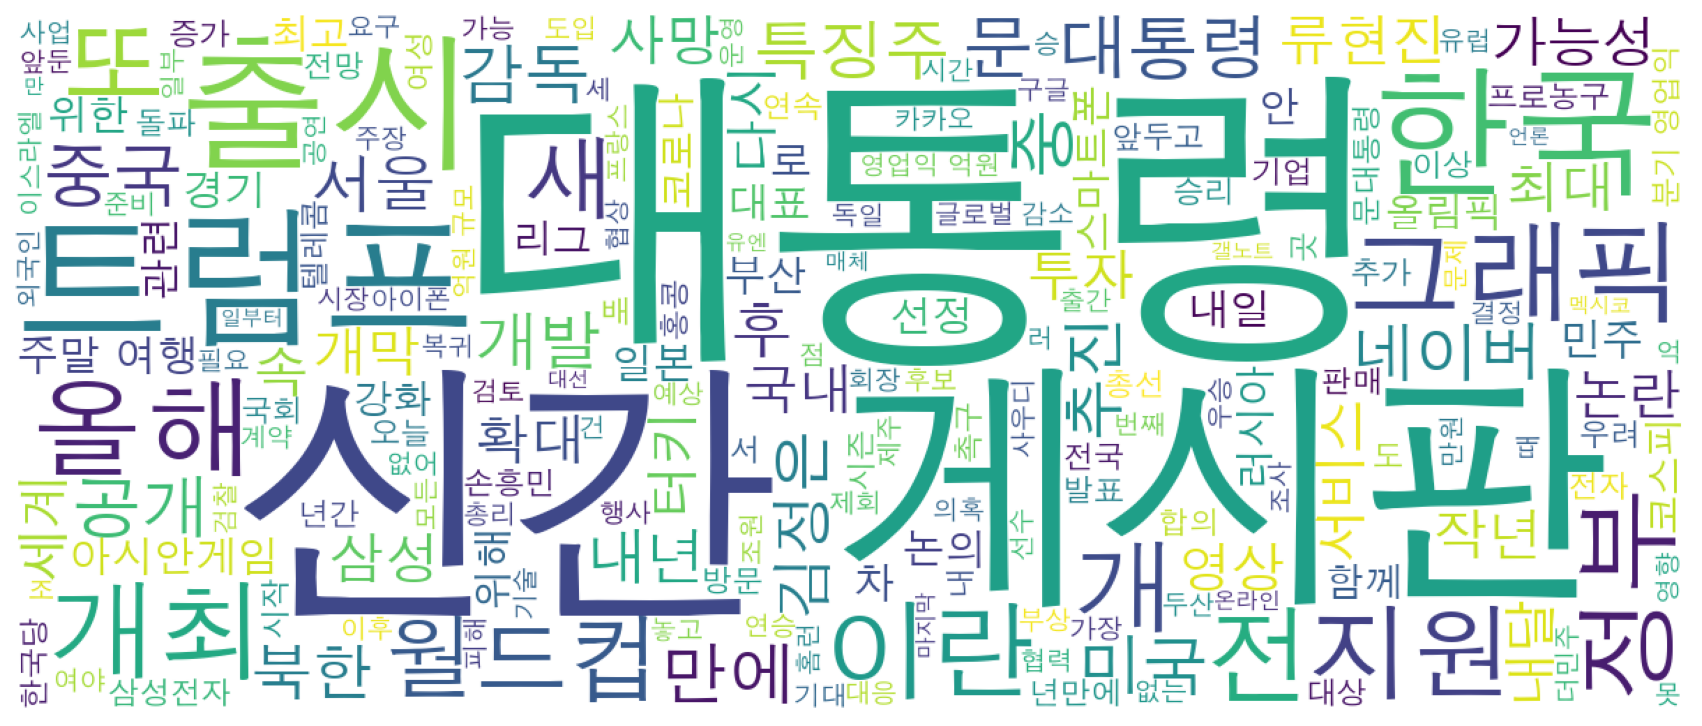

In [52]:
display_word_cloud(content)

In [64]:
np.delete(df['topic'].unique(),-1)

array(['세계', '정치', '스포츠', 'IT과학', '경제', '생활문화', '사회'], dtype=object)

세계


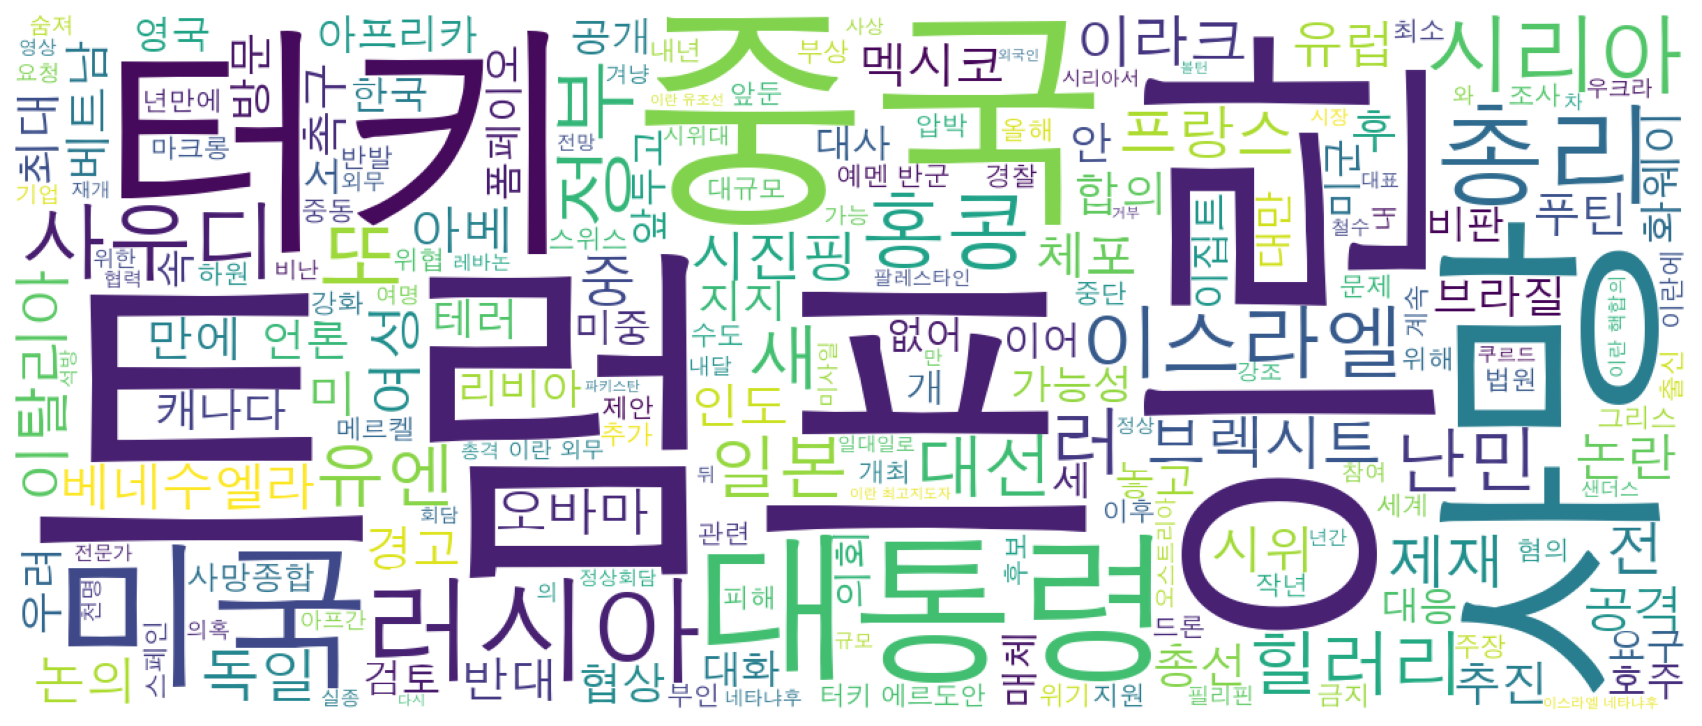

정치


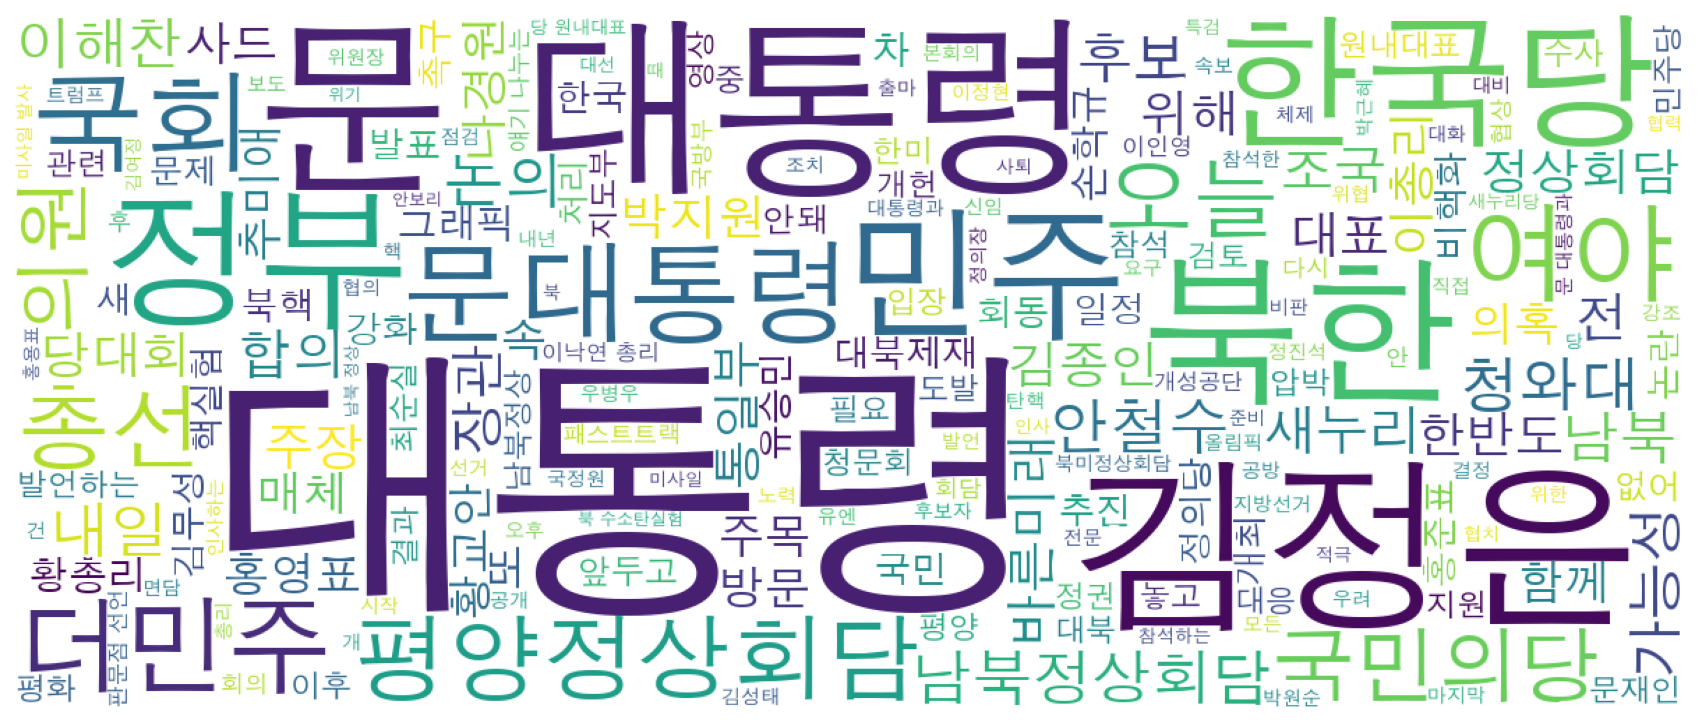

스포츠


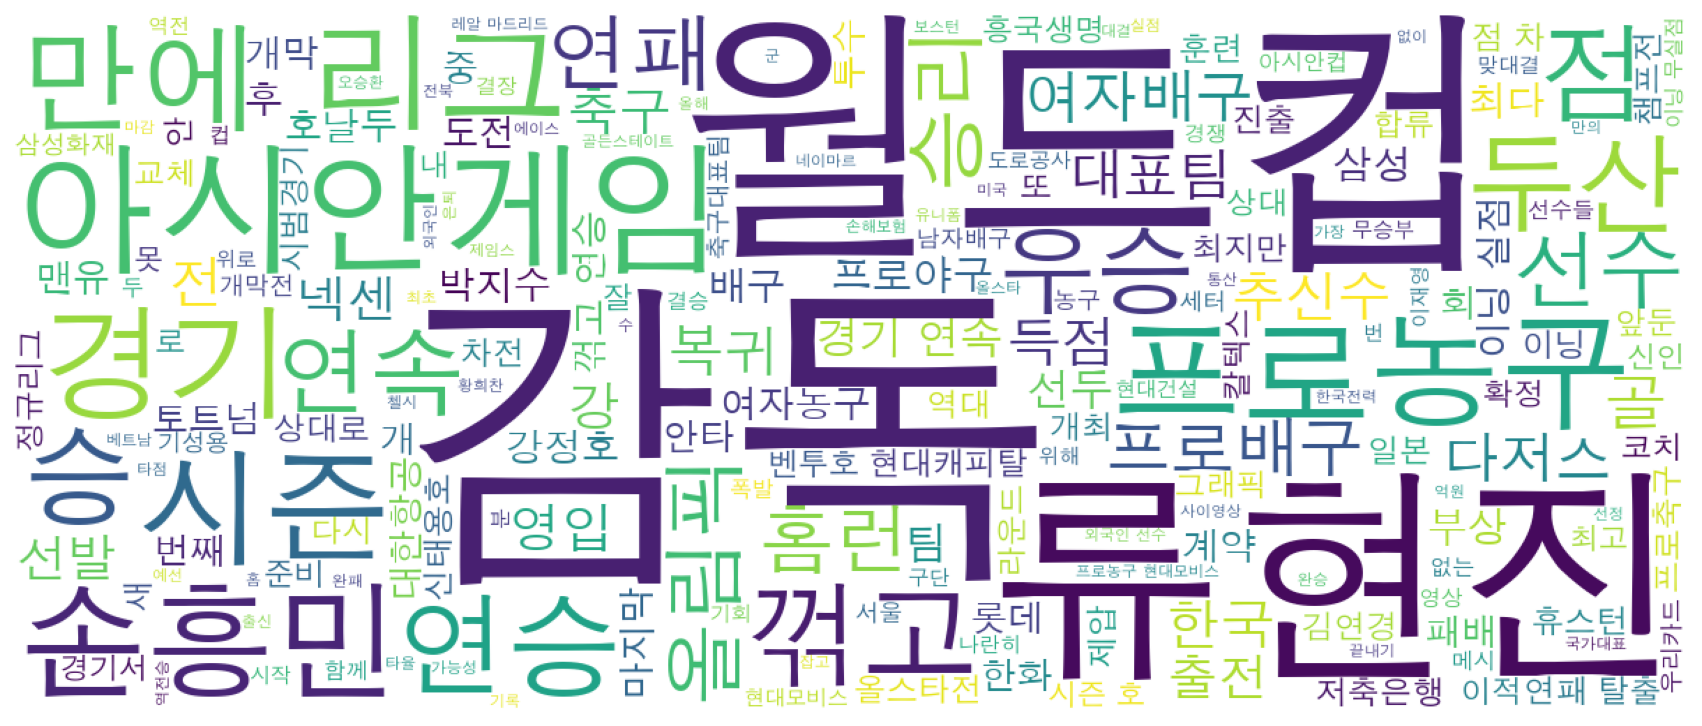

IT과학


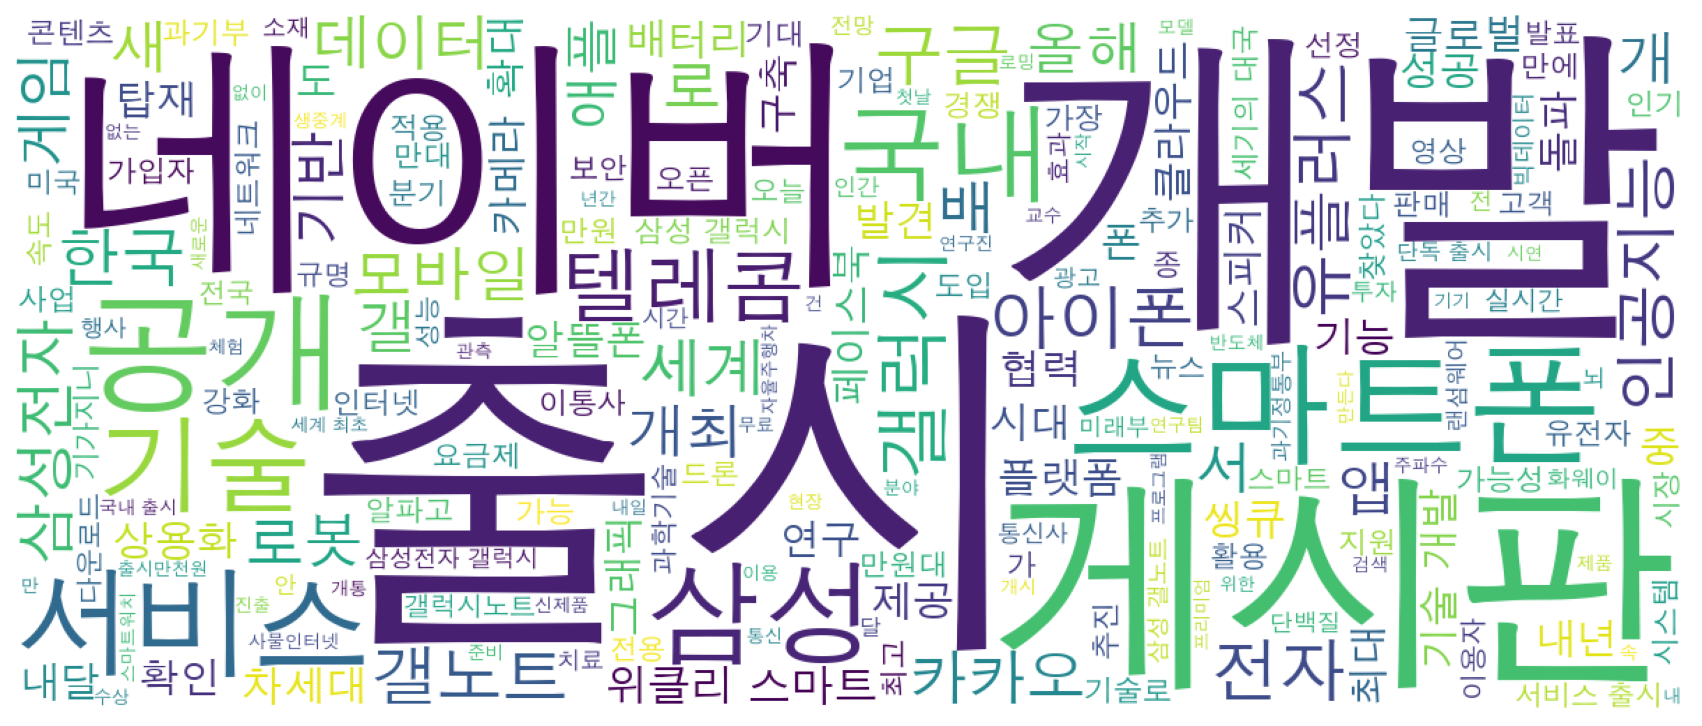

경제


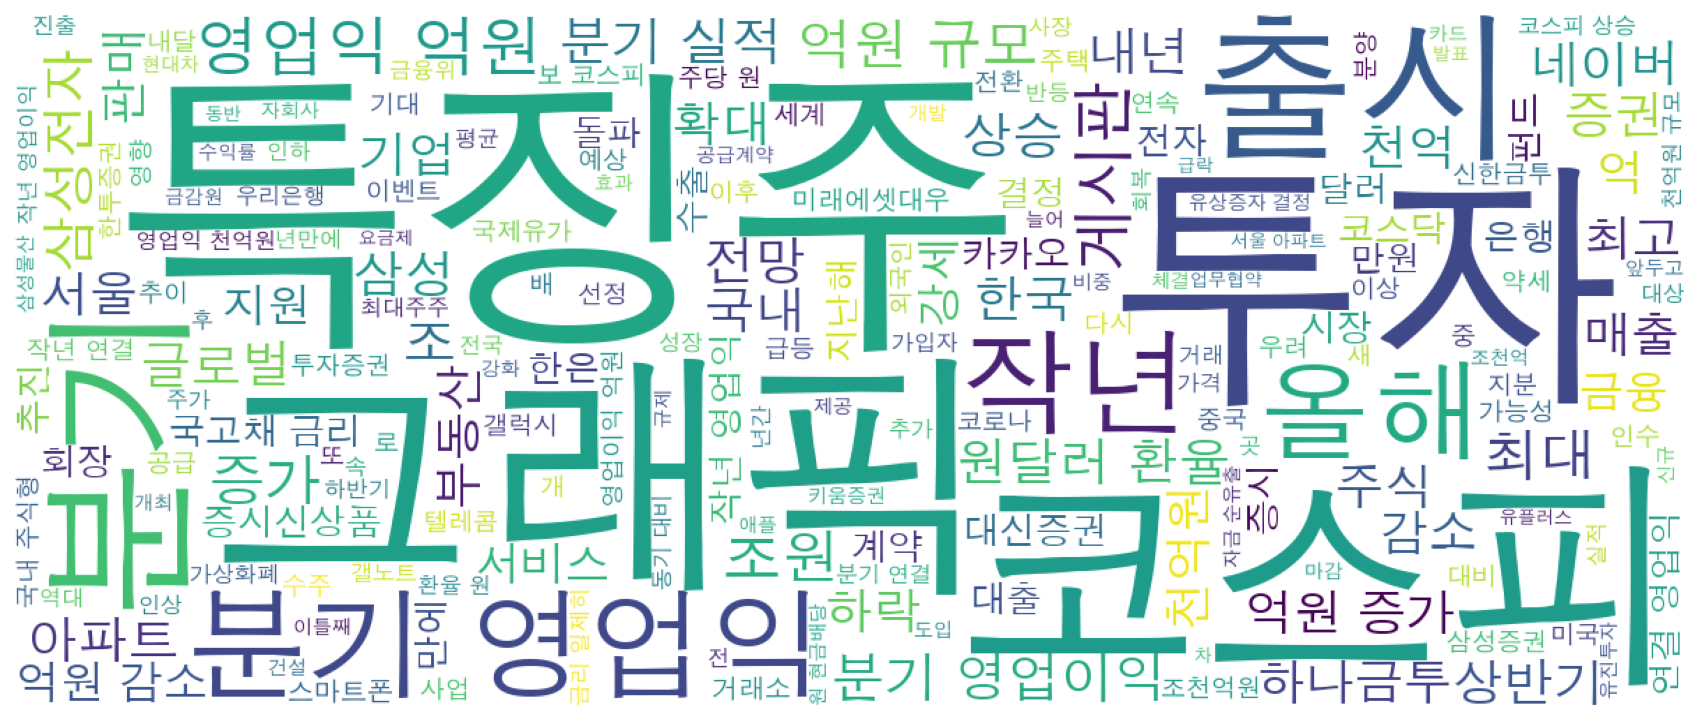

생활문화


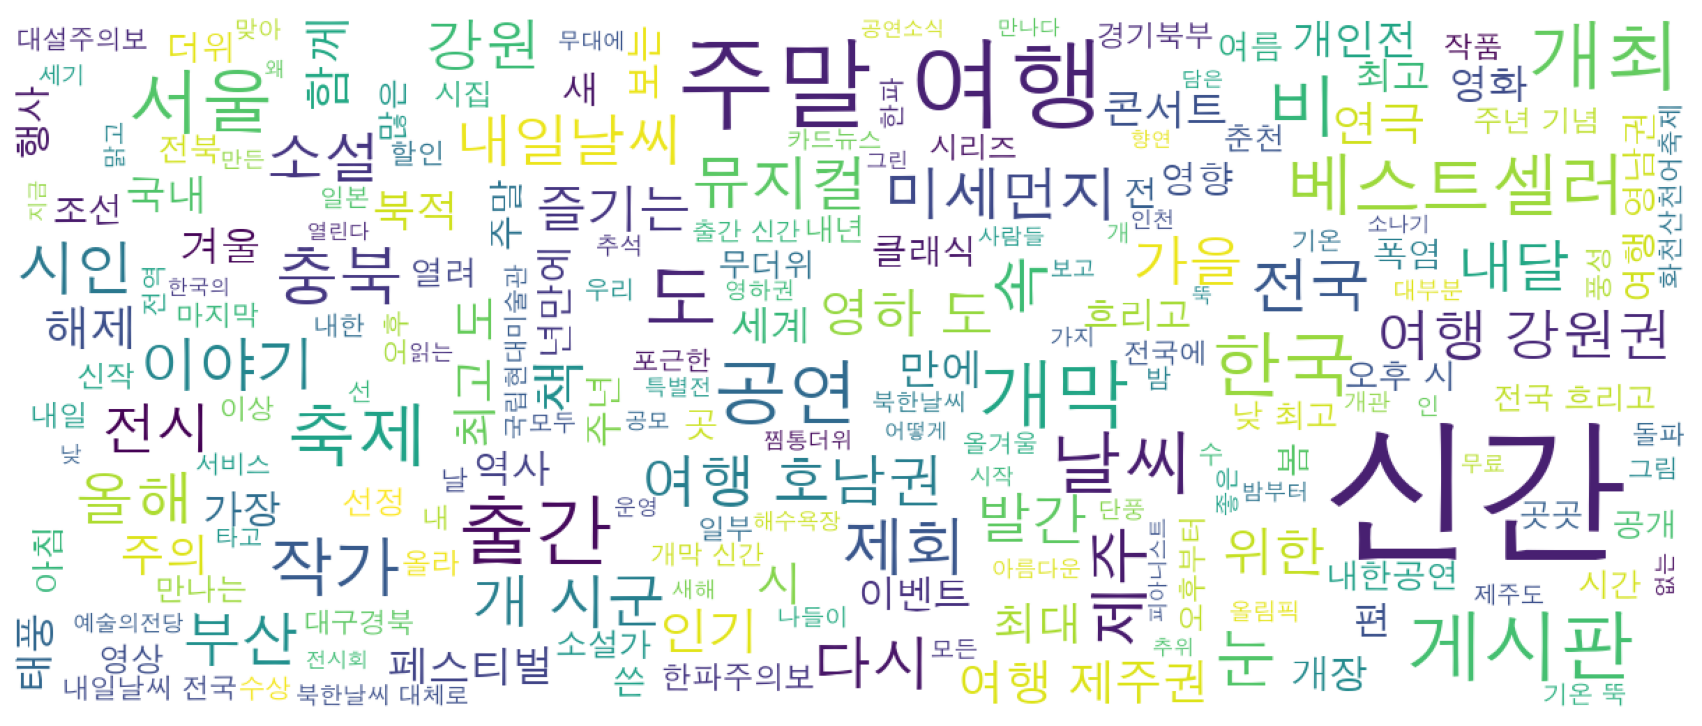

사회


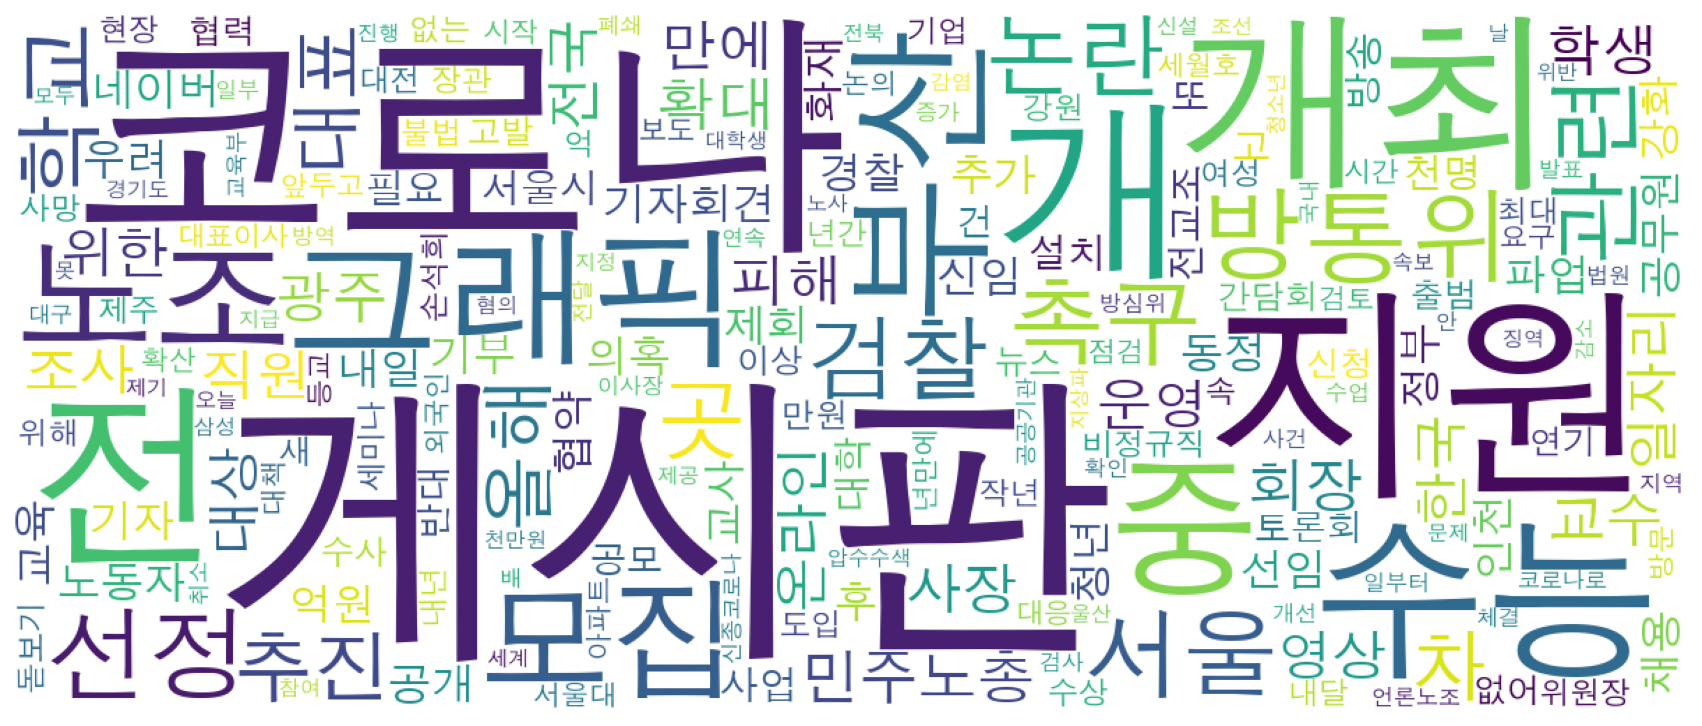

In [65]:
for topic in np.delete(df['topic'].unique(),-1):
    print(topic)
    content = ' '.join(df[df['topic'] == topic]['title'].to_list())
    display_word_cloud(content)